In [3]:
%matplotlib inline

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

In [5]:
pyber_ride_df=pd.read_csv("Resources/PyBer_ride_data.csv")
city_data_df=pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")
pyber_data_df =pd.merge(ride_data_df, city_data_df)#, on=['city','city'])

In [6]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [7]:
std=np.std(pyber_ride_df["Avg. Fare ($USD)"])

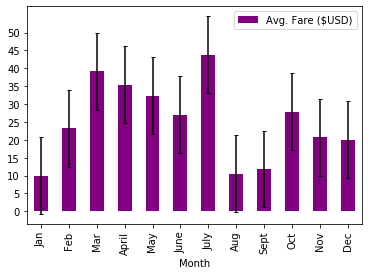

In [8]:
# Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]
# Plot the data.
pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)", color='purple', yerr=std, capsize = 2)
plt.xticks(x_axis, pyber_ride_df["Month"])
plt.yticks(np.arange(0,51,5))
plt.show()

In [40]:
#Separate data by city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [41]:
urban_ride_count=urban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count=suburban_cities_df.groupby('city').count()['ride_id']
rural_ride_count=rural_cities_df.groupby('city').count()['ride_id']

In [42]:
urban_avg_fare=urban_cities_df.groupby('city').mean()['fare']
suburban_avg_fare=suburban_cities_df.groupby('city').mean()['fare']
rural_avg_fare=rural_cities_df.groupby('city').mean()['fare']

In [43]:
urban_driver_count=urban_cities_df.groupby('city').mean()['driver_count']
suburban_driver_count=suburban_cities_df.groupby('city').mean()['driver_count']
rural_driver_count=rural_cities_df.groupby('city').mean()['driver_count']

In [44]:
x=pyber_data_df.groupby('city').mean()['driver_count']
x.sum()

2973.0

In [53]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [56]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [59]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

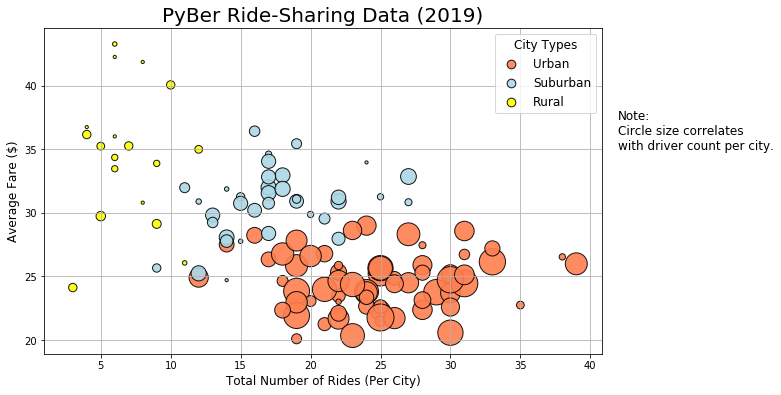

In [45]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="k", alpha=0.9, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="lightblue", edgecolor="k", alpha=0.9, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="yellow", edgecolor="k", alpha=0.9, label="Rural")

# Show the plot
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.show()

In [103]:
# Save the figure.
plt.savefig("Fig1.png")

<Figure size 432x288 with 0 Axes>

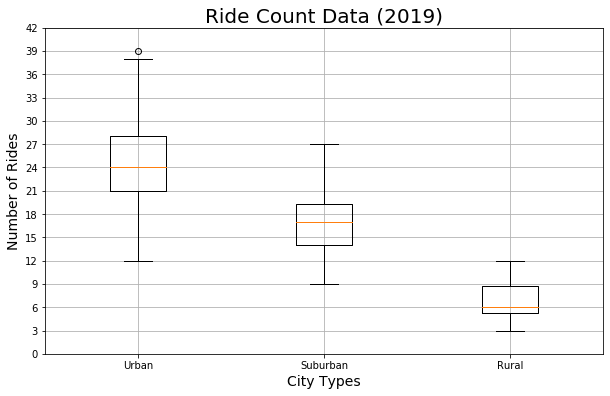

In [47]:
# Create a box-and-whisker plot for the urban cities ride count.
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Fig2.png")
plt.show()

In [48]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


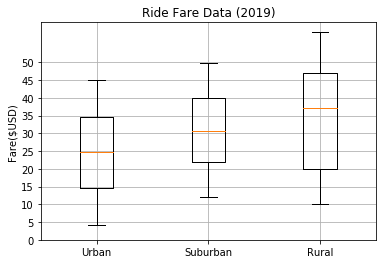

In [61]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data=[urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(ride_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("Fig3.png")
plt.show()

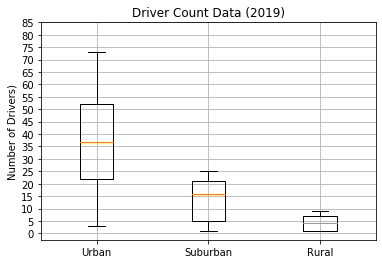

In [62]:
x_labels = ["Urban", "Suburban","Rural"]
drivers=[urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
plt.savefig("Fig4.png")
ax.grid()
plt.show()